# Lectura de matrices
En este archivo leemos las matrices y realizamos los respectivos calculos sobre ellas y observamos los resultados

In [1]:
import math, subprocess
import pandas as pd
import numpy as np
import random, math
import os
import shutil
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from IPython.display import display, clear_output
np.set_printoptions(threshold=sys.maxsize)

Metodo que inicia el ejecutable

In [2]:
def correr_experimento(archivo_instancia, iteraciones, experimento):
    process = subprocess.Popen(
        ["./tp3", archivo_instancia, str(iteraciones)], 
        stderr=subprocess.PIPE, 
        stdout=subprocess.PIPE, 
        stdin=subprocess.PIPE, 
        universal_newlines = True)
    exit_code = process.wait()
    if exit_code != 0: 
        print(F"Hubo un error en la experimentacion con la instancia {archivo_instancia}")
    else:
        if(not os.path.isdir(F"resultados/{experimento}")):
            os.mkdir(F"resultados/{experimento}")
    shutil.move("resultados/gauss_res.out", F"resultados/{experimento}/gauss_res.out")
    shutil.move("resultados/gauss_tiempo.out", F"resultados/{experimento}/gauss_tiempo.out")
    shutil.move("resultados/jacobi_res.out", F"resultados/{experimento}/jacobi_res.out")
    shutil.move("resultados/jacobi_error.out", F"resultados/{experimento}/jacobi_error.out")
    shutil.move("resultados/jacobi_tiempo.out", F"resultados/{experimento}/jacobi_tiempo.out")
    shutil.move("resultados/gauss_seidel_res.out", F"resultados/{experimento}/gauss_seidel_res.out")
    shutil.move("resultados/gauss_seidel_error.out", F"resultados/{experimento}/gauss_seidel_error.out")
    shutil.move("resultados/gauss_seidel_tiempo.out", F"resultados/{experimento}/gauss_seidel_tiempo.out")

    process.stdin.close();
    process.stdout.close();
    process.stderr.close();

Definimos ahora todos los experimentos sobre los cuales vamos a correr

In [3]:
casos = [
    "test_30_segundos",
    "test_aleatorio_desordenado",
    "test_completo",
    "test_sin_links"
]

In [4]:
experimentos = []
cant_exp = 5
iteraciones = 1000

for caso in casos:
    experimentos.append([
        caso,
        iteraciones
    ])
                    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")

In [5]:
num_out = 1
for experimento in experimentos:
    clear_output(wait=True)
    display('Experimento: ' + str(num_out) + "/" + str(len(experimentos)))
    display('Dataset: ' + str(experimento[0]))
    display('Iteraciones: ' + str(experimento[1]))
    correr_experimento(F"./tests/{experimento[0]}.txt", experimento[1], experimento[0])
    num_out += 1

'Experimento: 4/4'

'Dataset: test_sin_links'

'Iteraciones: 1000'

Leo los resultados y los paso a un dataframe para el cual haré graficos

In [6]:
def leer_resultado(archivo_instancia):
    """
    f_list = []
    with open(archivo_instancia, "r") as file:
        for line in file:
            num = np.float64(line)
            if(num < sys.float_info.max and num > sys.float_info.min):
                f_list.append(float(num))
            else:
                f_list.append(0)
    return f_list
    """
    return pd.read_csv(archivo_instancia, names=["valores"])

In [7]:
"""
f_list = []
with open(F"./resultados/{caso}/jacobi_error.out", "r") as file:
    for line in file:
        num = np.float64(line)
        if(num < sys.float_info.max and num > sys.float_info.min):
            f_list.append(float(num))
        else:
            f_list.append(float(0))
"""

'\nf_list = []\nwith open(F"./resultados/{caso}/jacobi_error.out", "r") as file:\n    for line in file:\n        num = np.float64(line)\n        if(num < sys.float_info.max and num > sys.float_info.min):\n            f_list.append(float(num))\n        else:\n            f_list.append(float(0))\n'

In [8]:
investigacion = {}
for caso in casos:
    investigacion[caso] = {
        "gauss_res": [],
        "gauss_tiempo": [],
        "jacobi_res": [],
        "jacobi_error": [],
        "jacobi_tiempo": [],
        "gauss_seidel_res": [],
        "gauss_seidel_error": [],
        "gauss_seidel_tiempo": []
    }

In [9]:
for caso in casos:
    investigacion[caso]["gauss_res"] = leer_resultado(F"./resultados/{caso}/gauss_res.out")
    investigacion[caso]["gauss_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_tiempo.out")
    investigacion[caso]["jacobi_res"] = leer_resultado(F"./resultados/{caso}/jacobi_res.out")
    investigacion[caso]["jacobi_error"] = leer_resultado(F"./resultados/{caso}/jacobi_error.out")
    investigacion[caso]["jacobi_tiempo"] = leer_resultado(F"./resultados/{caso}/jacobi_tiempo.out")
    investigacion[caso]["gauss_seidel_res"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_res.out")
    investigacion[caso]["gauss_seidel_error"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_error.out")
    investigacion[caso]["gauss_seidel_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_tiempo.out")

Obtenidos todos los resultados paso a armar los graficos

In [10]:
# Experimentamos con los errores obtenidos
# Este método no funciona. Me genera problemas con los valores por representación
"""
jacobi_error_arr = []
for i in range(0, len(jacobi_error)):
    jacobi_error_arr.append([i, jacobi_error[i]])

gauss_seidel_arr = []
for i in range(0, len(gauss_seidel_error)):
    gauss_seidel_arr.append([i, gauss_seidel_error[i]])

df_jacobi_error = pd.DataFrame(jacobi_error_arr, columns=["Iteracion", "Error"]);
df_gauss_seidel_error = pd.DataFrame(gauss_seidel_arr, columns=["Iteracion", "Error"]);
"""

'\njacobi_error_arr = []\nfor i in range(0, len(jacobi_error)):\n    jacobi_error_arr.append([i, jacobi_error[i]])\n\ngauss_seidel_arr = []\nfor i in range(0, len(gauss_seidel_error)):\n    gauss_seidel_arr.append([i, gauss_seidel_error[i]])\n\ndf_jacobi_error = pd.DataFrame(jacobi_error_arr, columns=["Iteracion", "Error"]);\ndf_gauss_seidel_error = pd.DataFrame(gauss_seidel_arr, columns=["Iteracion", "Error"]);\n'

### TEST 30 SEGUNDOS

In [11]:
caso_actual = casos[0]
# Leo errores
gauss_res = investigacion[caso_actual]["gauss_res"]
jacobi_res = investigacion[caso_actual]["jacobi_res"]
jacobi_error = investigacion[caso_actual]["jacobi_error"]
gauss_seidel_res = investigacion[caso_actual]["gauss_seidel_res"]
gauss_seidel_error = investigacion[caso_actual]["gauss_seidel_error"]

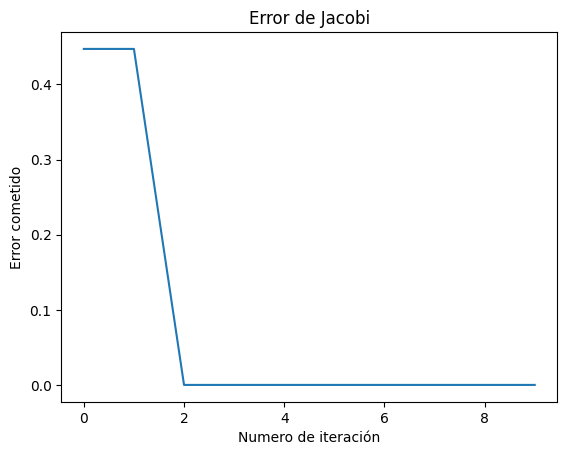

In [37]:
plt.plot(jacobi_error[:10])
plt.title("Error de Jacobi")
plt.xlabel("Numero de iteración")
plt.ylabel("Error cometido")
plt.savefig("graficos/jacobi-error-30-segundos.png")
plt.show()

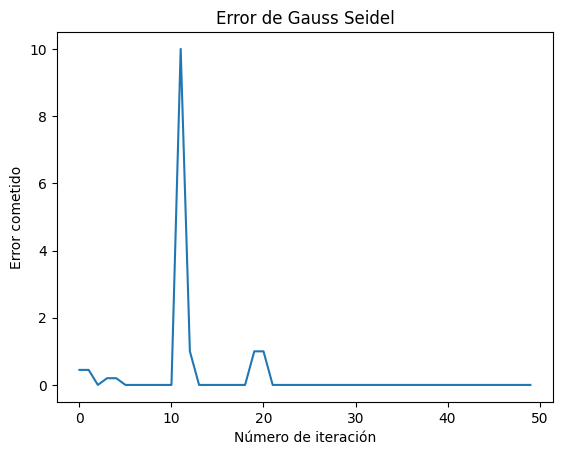

In [38]:
plt.plot(gauss_seidel_error[:50])
plt.title("Error de Gauss Seidel")
plt.xlabel("Número de iteración")
plt.ylabel("Error cometido")
plt.savefig("graficos/gauss-seidel-error-30-segundos.png")
plt.show()

### TEST ALEATORIO DESORDENADO

In [14]:
caso_actual = casos[1]
# Leo errores
gauss_res = investigacion[caso_actual]["gauss_res"]
jacobi_res = investigacion[caso_actual]["jacobi_res"]
jacobi_error = investigacion[caso_actual]["jacobi_error"]
gauss_seidel_res = investigacion[caso_actual]["gauss_seidel_res"]
gauss_seidel_error = investigacion[caso_actual]["gauss_seidel_error"]

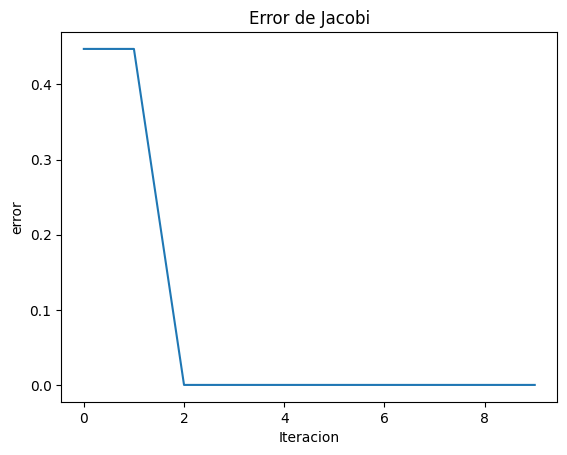

In [39]:
plt.plot(jacobi_error[:10])
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.savefig("graficos/jacobi-error-aleatorio.png")
plt.show()

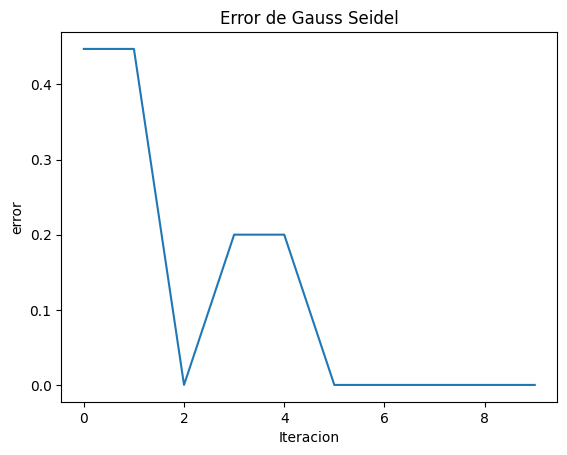

In [40]:
plt.plot(gauss_seidel_error[:10])
plt.title("Error de Gauss Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.savefig("graficos/gauss-seidel-error-aleatorio.png")
plt.show()

### TEST COMPLETO

In [46]:
caso_actual = casos[2]
# Leo errores
gauss_res = investigacion[caso_actual]["gauss_res"]
jacobi_res = investigacion[caso_actual]["jacobi_res"]
jacobi_error = investigacion[caso_actual]["jacobi_error"]
gauss_seidel_res = investigacion[caso_actual]["gauss_seidel_res"]
gauss_seidel_error = investigacion[caso_actual]["gauss_seidel_error"]

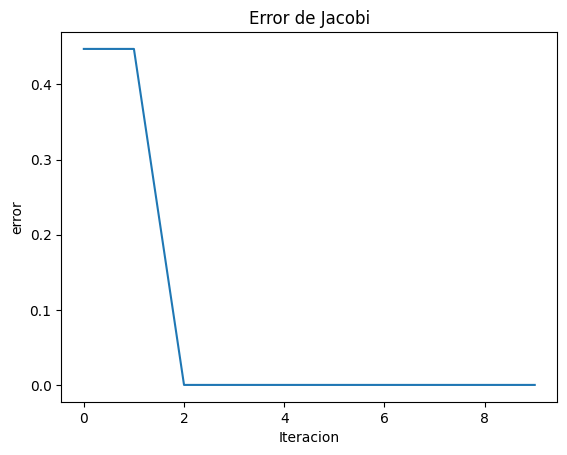

In [47]:
plt.plot(jacobi_error[:10])
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.savefig("graficos/jacobi-error-completo.png")
plt.show()

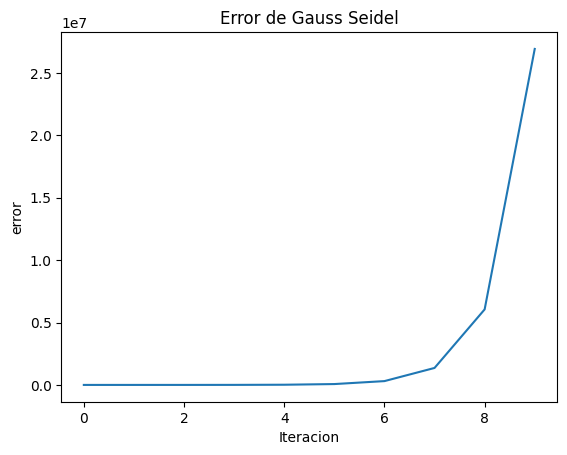

In [48]:
plt.plot(gauss_seidel_error[:10])
plt.title("Error de Gauss Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.savefig("graficos/gauss-seidel-error-completo.png")
plt.show()

### Procedemos a calcular los tiempos de cada uno

In [20]:
tiempo_jacobi = []
tiempo_gauss_seidel = []
tiempo_gauss = []
tiempos = []

for caso in casos:
    tiempo_jacobi.append(investigacion[caso]["jacobi_tiempo"]["valores"])
    tiempo_gauss_seidel.append(investigacion[caso]["gauss_seidel_tiempo"]["valores"])
    tiempo_gauss.append(investigacion[caso]["gauss_tiempo"]["valores"])

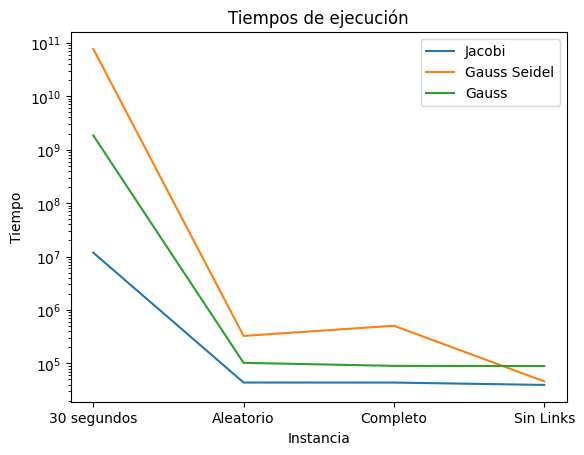

In [50]:
x_ticks = range(len(tiempo_jacobi))
nombres_casos = ["30 segundos", "Aleatorio", "Completo", "Sin Links"]
plt.plot(x_ticks, tiempo_jacobi, label = "Jacobi")
plt.plot(x_ticks, tiempo_gauss_seidel, label = "Gauss Seidel")
plt.plot(x_ticks, tiempo_gauss, label = "Gauss")
plt.title("Tiempos de ejecución")
plt.xlabel("Instancia")
plt.ylabel("Tiempo")
plt.yscale('log')
plt.xticks(x_ticks, nombres_casos)
plt.legend()
plt.savefig("graficos/tiempos-ejecucion.png")
plt.show()

In [22]:
caso_sumidero_zero = [
    "sumidero-0-0",
    "sumidero-0-1",
    "sumidero-0-2",
    "sumidero-0-3",
    "sumidero-0-4"
]

In [23]:
caso_sumidero_uno = [
    "sumidero-1-0",
    "sumidero-1-1",
    "sumidero-1-2",
    "sumidero-1-3",
    "sumidero-1-4"
]

In [24]:
experimentos_zero = []
experimentos_uno = []
cant_exp = 5
iteraciones = 1000

for caso in caso_sumidero_zero:
    experimentos_zero.append([
        caso,
        iteraciones
    ])
    

for caso in caso_sumidero_uno:
    experimentos_uno.append([
        caso,
        iteraciones
    ])
    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")

In [25]:
num_out = 1
for experimento in experimentos_zero:
    clear_output(wait=True)
    display('Experimento: ' + str(num_out) + "/" + str(len(experimentos_zero)))
    display('Dataset: ' + str(experimento[0]))
    display('Iteraciones: ' + str(experimento[1]))
    correr_experimento(F"./tests/{experimento[0]}.txt", experimento[1], experimento[0])
    num_out += 1

'Experimento: 5/5'

'Dataset: sumidero-0-4'

'Iteraciones: 1000'

In [26]:
num_out = 1
for experimento in experimentos_uno:
    clear_output(wait=True)
    display('Experimento: ' + str(num_out) + "/" + str(len(experimentos_uno)))
    display('Dataset: ' + str(experimento[0]))
    display('Iteraciones: ' + str(experimento[1]))
    correr_experimento(F"./tests/{experimento[0]}.txt", experimento[1], experimento[0])    
    num_out += 1

'Experimento: 5/5'

'Dataset: sumidero-1-4'

'Iteraciones: 1000'

In [27]:
investigacion_sumidero_zero = {}
for caso in caso_sumidero_zero:
    investigacion_sumidero_zero[caso] = {
        "gauss_res": [],
        "gauss_tiempo": [],
        "jacobi_res": [],
        "jacobi_error": [],
        "jacobi_tiempo": [],
        "gauss_seidel_res": [],
        "gauss_seidel_error": [],
        "gauss_seidel_tiempo": []
    }
    
for caso in caso_sumidero_zero:
    investigacion_sumidero_zero[caso]["gauss_res"] = leer_resultado(F"./resultados/{caso}/gauss_res.out")
    investigacion_sumidero_zero[caso]["gauss_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_tiempo.out")
    investigacion_sumidero_zero[caso]["jacobi_res"] = leer_resultado(F"./resultados/{caso}/jacobi_res.out")
    investigacion_sumidero_zero[caso]["jacobi_error"] = leer_resultado(F"./resultados/{caso}/jacobi_error.out")
    investigacion_sumidero_zero[caso]["jacobi_tiempo"] = leer_resultado(F"./resultados/{caso}/jacobi_tiempo.out")
    investigacion_sumidero_zero[caso]["gauss_seidel_res"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_res.out")
    investigacion_sumidero_zero[caso]["gauss_seidel_error"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_error.out")
    investigacion_sumidero_zero[caso]["gauss_seidel_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_tiempo.out")

In [28]:
tiempo_jacobi_sz = []
tiempo_gauss_seidel_sz = []
tiempo_gauss_sz = []

for caso in caso_sumidero_zero:
    tiempo_jacobi_sz.append(investigacion_sumidero_zero[caso]["jacobi_tiempo"]["valores"])
    tiempo_gauss_seidel_sz.append(investigacion_sumidero_zero[caso]["gauss_seidel_tiempo"]["valores"])
    tiempo_gauss_sz.append(investigacion_sumidero_zero[caso]["gauss_tiempo"]["valores"])

In [29]:
# Buscaremos la cantidad de relaciones
relaciones_sz = []
for caso in caso_sumidero_zero:
    file = open(F"./tests/{caso}.txt", "r")
    Lines = file.readlines()
    relaciones_sz.append(int(Lines[1]))

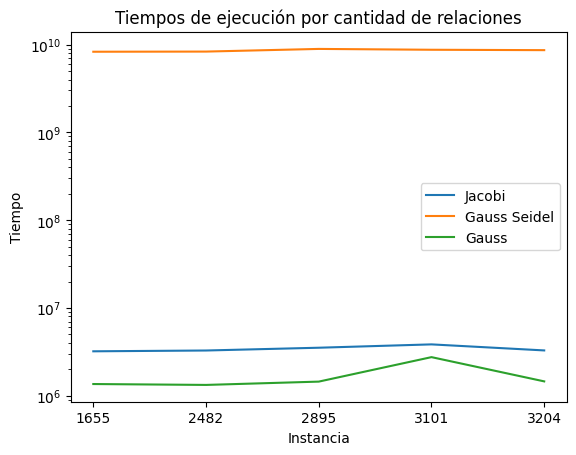

In [44]:
x_ticks = range(len(tiempo_jacobi_sz))
plt.plot(x_ticks, tiempo_jacobi_sz, label = "Jacobi")
plt.plot(x_ticks, tiempo_gauss_seidel_sz, label = "Gauss Seidel")
plt.plot(x_ticks, tiempo_gauss_sz, label = "Gauss")
plt.title("Tiempos de ejecución por cantidad de relaciones")
plt.xlabel("Instancia")
plt.ylabel("Tiempo")
plt.yscale('log')
plt.xticks(x_ticks, relaciones_sz)
plt.legend()
plt.savefig("graficos/tiempos-ejecucion_sumidero_relaciones_0.png")
plt.show()

In [31]:
investigacion_sumidero_uno = {}
for caso in caso_sumidero_uno:
    investigacion_sumidero_uno[caso] = {
        "gauss_res": [],
        "gauss_tiempo": [],
        "jacobi_res": [],
        "jacobi_error": [],
        "jacobi_tiempo": [],
        "gauss_seidel_res": [],
        "gauss_seidel_error": [],
        "gauss_seidel_tiempo": []
    }
    
for caso in caso_sumidero_uno:
    investigacion_sumidero_uno[caso]["gauss_res"] = leer_resultado(F"./resultados/{caso}/gauss_res.out")
    investigacion_sumidero_uno[caso]["gauss_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_tiempo.out")
    investigacion_sumidero_uno[caso]["jacobi_res"] = leer_resultado(F"./resultados/{caso}/jacobi_res.out")
    investigacion_sumidero_uno[caso]["jacobi_error"] = leer_resultado(F"./resultados/{caso}/jacobi_error.out")
    investigacion_sumidero_uno[caso]["jacobi_tiempo"] = leer_resultado(F"./resultados/{caso}/jacobi_tiempo.out")
    investigacion_sumidero_uno[caso]["gauss_seidel_res"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_res.out")
    investigacion_sumidero_uno[caso]["gauss_seidel_error"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_error.out")
    investigacion_sumidero_uno[caso]["gauss_seidel_tiempo"] = leer_resultado(F"./resultados/{caso}/gauss_seidel_tiempo.out")

In [32]:
tiempo_jacobi_su = []
tiempo_gauss_seidel_su = []
tiempo_gauss_su = []

for caso in caso_sumidero_uno:
    tiempo_jacobi_su.append(investigacion_sumidero_uno[caso]["jacobi_tiempo"]["valores"])
    tiempo_gauss_seidel_su.append(investigacion_sumidero_uno[caso]["gauss_seidel_tiempo"]["valores"])
    tiempo_gauss_su.append(investigacion_sumidero_uno[caso]["gauss_tiempo"]["valores"])

In [33]:
# Buscaremos la cantidad de relaciones
relaciones_su = []
for caso in caso_sumidero_uno:
    file = open(F"./tests/{caso}.txt", "r")
    Lines = file.readlines()
    relaciones_su.append(int(Lines[1]))

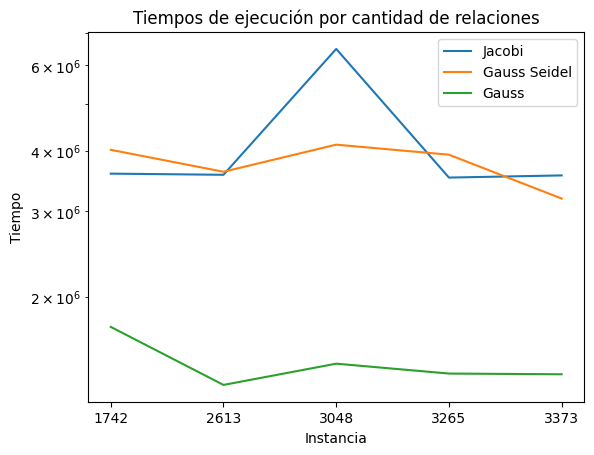

In [45]:
x_ticks = range(len(tiempo_jacobi_sz))
plt.plot(x_ticks, tiempo_jacobi_su, label = "Jacobi")
plt.plot(x_ticks, tiempo_gauss_seidel_su, label = "Gauss Seidel")
plt.plot(x_ticks, tiempo_gauss_su, label = "Gauss")
plt.title("Tiempos de ejecución por cantidad de relaciones")
plt.xlabel("Instancia")
plt.ylabel("Tiempo")
plt.yscale('log')
plt.xticks(x_ticks, relaciones_su)
plt.legend()
plt.savefig("graficos/tiempos-ejecucion_sumidero_relaciones_1.png")
plt.show()